# Performing EDA on Smartphones Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "C:\\Users\\Lenovo\\Desktop\\Shivam\\campusx projects\\smartphone_EDA\\my_cleaned_smartphones_dataset.xlsx"

# Loading data
df = pd.read_excel(data_path)

df.head()

,Unnamed: 0,brand,model,price,rating,sim_type,has_5G,has_NFC,has_ir_blaster,processor_brand,...,resolution_width,resolution_height,refresh_rate,rear_camera_count,front_camera_count,rear_primary_mp,front_primary_mp,extended_memory_available,extended_upto,os
0,0,Oppo,Oppo F31 Pro 5G,26999,81,Dual Sim,1,0,0,Dimensity,...,1080.0,2372.0,120.0,2,1.0,50.0,32.0,NaN,NaN,Android
1,1,Vivo,Vivo Y500 5G,17990,81,Dual Sim,1,1,0,Dimensity,...,1080.0,2392.0,120.0,2,1.0,50.0,8.0,1.0,2048.0,Android
2,2,Oppo,Oppo F31 5G,22999,78,Dual Sim,1,0,1,Dimensity,...,1080.0,2412.0,120.0,2,1.0,50.0,16.0,NaN,NaN,Android
3,3,Oppo,Oppo F31 Pro Plus 5G,32999,82,Dual Sim,1,0,0,Snapdragon,...,1280.0,2800.0,120.0,2,1.0,50.0,32.0,NaN,NaN,Android
4,4,Apple,Apple iPhone 17,82900,78,Dual Sim,1,1,0,Apple-Bionic,...,1206.0,2622.0,120.0,2,1.0,48.0,18.0,0.0,NaN,iOS


In [3]:
df.drop(columns= "Unnamed: 0", inplace= True)

In [4]:
df.head(3)

,brand,model,price,rating,sim_type,has_5G,has_NFC,has_ir_blaster,processor_brand,processor_name,...,resolution_width,resolution_height,refresh_rate,rear_camera_count,front_camera_count,rear_primary_mp,front_primary_mp,extended_memory_available,extended_upto,os
0,Oppo,Oppo F31 Pro 5G,26999,81,Dual Sim,1,0,0,Dimensity,Dimensity 7300 Energy,...,1080.0,2372.0,120.0,2,1.0,50.0,32.0,NaN,NaN,Android
1,Vivo,Vivo Y500 5G,17990,81,Dual Sim,1,1,0,Dimensity,Dimensity 7300,...,1080.0,2392.0,120.0,2,1.0,50.0,8.0,1.0,2048.0,Android
2,Oppo,Oppo F31 5G,22999,78,Dual Sim,1,0,1,Dimensity,Dimensity 6300,...,1080.0,2412.0,120.0,2,1.0,50.0,16.0,NaN,NaN,Android


In [5]:
# shape of data
df.shape

(1015, 28)

In [6]:
# duplicates in data
df.duplicated().sum().item()

1

In [7]:
# duplicate values
df[df.duplicated(keep=False)]

,brand,model,price,rating,sim_type,has_5G,has_NFC,has_ir_blaster,processor_brand,processor_name,...,resolution_width,resolution_height,refresh_rate,rear_camera_count,front_camera_count,rear_primary_mp,front_primary_mp,extended_memory_available,extended_upto,os
994,Nothing,Nothing Phone 3a (12GB RAM + 256GB),28999,86,Dual Sim,1,1,0,Snapdragon,Snapdragon 7s Gen3,...,1080.0,2392.0,120.0,3,1.0,50.0,32.0,NaN,NaN,Android
995,Nothing,Nothing Phone 3a (12GB RAM + 256GB),28999,86,Dual Sim,1,1,0,Snapdragon,Snapdragon 7s Gen3,...,1080.0,2392.0,120.0,3,1.0,50.0,32.0,NaN,NaN,Android


In [8]:
# droping duplicate values
df = df.drop_duplicates(keep = "first")

In [9]:
# correcting the index:
df.reset_index(inplace= True)
df.drop(columns= "index",inplace= True)

In [10]:
# checking for duplicate
df.duplicated().sum().item()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      1014 non-null   object 
 1   model                      1014 non-null   object 
 2   price                      1014 non-null   int64  
 3   rating                     1014 non-null   int64  
 4   sim_type                   1014 non-null   object 
 5   has_5G                     1014 non-null   int64  
 6   has_NFC                    1014 non-null   int64  
 7   has_ir_blaster             1014 non-null   int64  
 8   processor_brand            1014 non-null   object 
 9   processor_name             1014 non-null   object 
 10  processor_speed            863 non-null    float64
 11  processor_cores            1007 non-null   float64
 12  ram                        1014 non-null   int64  
 13  storage(Gb)                1014 non-null   int64

In [12]:
# columns with missing values
df.isna().sum().loc[lambda ser : ser.gt(0)]

processor_speed              151
processor_cores                7
battery_capacity               7
charging_power                69
resolution_width               4
resolution_height              4
refresh_rate                  75
front_camera_count             4
front_primary_mp               6
extended_memory_available    375
extended_upto                710
os                            25
dtype: int64

In [13]:
#  imputing "extended_upto" column:

df.loc[(df.extended_memory_available == 0) & df.extended_upto.isna(), "extended_upto"] = 0

In [14]:
df.isna().sum().loc[lambda ser : ser.gt(0)]

processor_speed              151
processor_cores                7
battery_capacity               7
charging_power                69
resolution_width               4
resolution_height              4
refresh_rate                  75
front_camera_count             4
front_primary_mp               6
extended_memory_available    375
extended_upto                469
os                            25
dtype: int64

## Univariate Analysis

### "brand"

In [15]:
# top 10 brands by availability in the market:
df.brand.value_counts().head(10)

brand
Samsung     134
Vivo        127
Realme      113
Oppo         79
Xiaomi       78
Motorola     59
Iqoo         55
Oneplus      52
Poco         43
Infinix      42
Name: count, dtype: int64

In [16]:
# percentage wise presence in the market:
round(df.brand.value_counts(normalize= True).head(10)*100,2)

brand
Samsung     13.21
Vivo        12.52
Realme      11.14
Oppo         7.79
Xiaomi       7.69
Motorola     5.82
Iqoo         5.42
Oneplus      5.13
Poco         4.24
Infinix      4.14
Name: proportion, dtype: float64

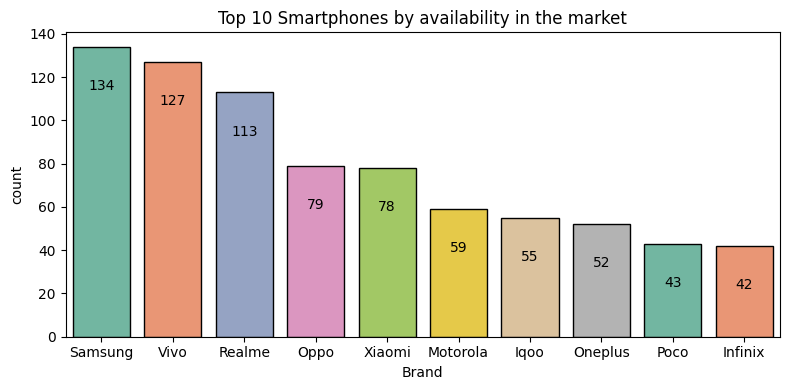

In [17]:
# plotting a bar graph for top 10 smartphones by availability in the market:

plt.figure(figsize= (8,4))
sns.barplot(x= df.brand.value_counts().head(10).index,
           y= df.brand.value_counts().head(10).values,
           color= "orange", edgecolor= "k",palette="Set2")

for i,j in enumerate(df.brand.value_counts().head(10).values):
    plt.text(i,j-20,j,ha= "center")

plt.title("Top 10 Smartphones by availability in the market")
plt.ylabel("count")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()

### "price"

In [18]:
df.price.describe()

count      1014.000000
mean      37227.274162
std       42077.917738
min        3499.000000
25%       15499.000000
50%       23999.000000
75%       39998.750000
max      489990.000000
Name: price, dtype: float64

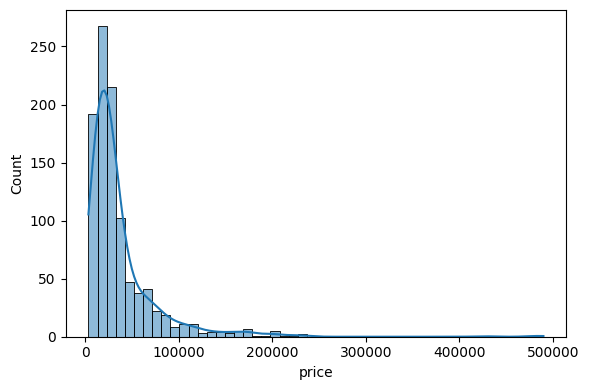

In [19]:
# plotting a histogram and kde plot

plt.figure(figsize= (6,4))
sns.histplot(x= df.price, bins= 50, kde= True,)
plt.tight_layout()
plt.show()

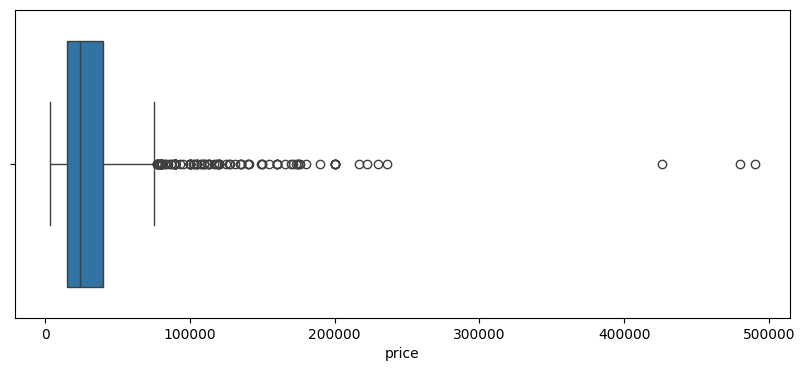

In [20]:
# plotting box-plot:

plt.figure(figsize= (10,4))
sns.boxplot(x = df.price)
plt.show()

In [21]:
# checking for missing value
df.price.isna().sum().item()

0

### "rating"

In [22]:
df.rating.describe()

count    1014.000000
mean       80.438856
std         7.133179
min        33.000000
25%        77.000000
50%        82.000000
75%        85.000000
max        97.000000
Name: rating, dtype: float64

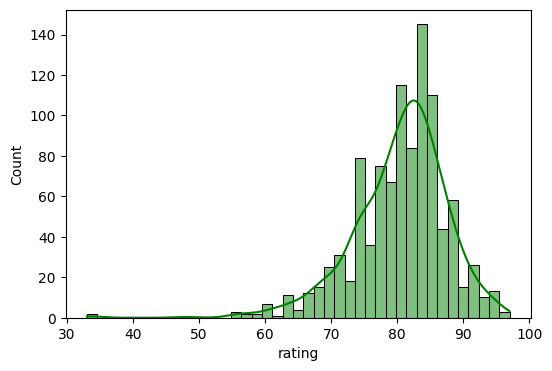

In [23]:
# histplot and kde-plot

plt.figure(figsize= (6,4))
sns.histplot(x= df.rating, color= "green", edgecolor= "k",
            kde= True)
plt.show()

In [24]:
#  skewness
round(df.rating.skew().item(),2)

-1.16

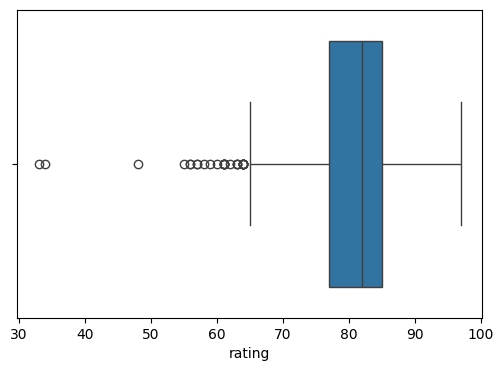

In [25]:
# box-plot
plt.figure(figsize= (6,4))
sns.boxplot( x= df.rating)
plt.show()

In [26]:
# missing value in rating column
df.rating.isna().sum().item()

0

### has_5g  

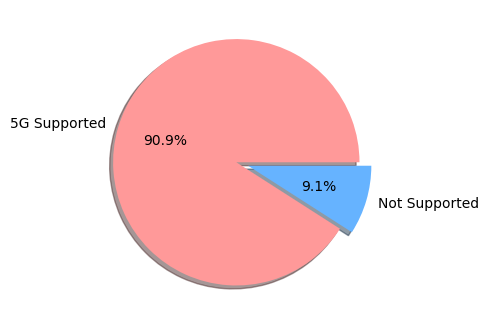

In [27]:
#  pie chart

label = {0:"Not Supported",1:"5G Supported"}
counts = df.has_5G.value_counts().index
colors = ["#ff9999", "#66b3ff"] 
plt.figure(figsize= (5,4))
plt.pie(df.has_5G.value_counts().values,
       labels= [label[i] for i in counts] ,
       autopct= "%0.1f%%",
       shadow= True,
       colors= colors,
       explode= [0.05,0.05])
plt.show()

In [28]:
# checking for missing value
df.has_5G.isna().sum().item()

0

### has_NFC

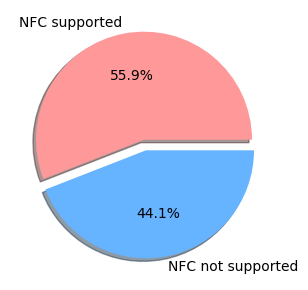

In [29]:
# pie chart
label= {0:"NFC not supported",1:"NFC supported"}
counts = df.has_NFC.value_counts().index
colors = ["#ff9999", "#66b3ff"] 
plt.figure(figsize= (4,3))
plt.pie(
    df.has_NFC.value_counts().values,
    labels= [label[i] for i in counts],
    autopct= "%0.1f%%",
    shadow= True,
    colors= colors,
    explode= [0.05,0.05]
)
plt.tight_layout()
plt.show()

In [30]:
df.has_NFC.isna().sum().item()

0

### has_ir_blaster

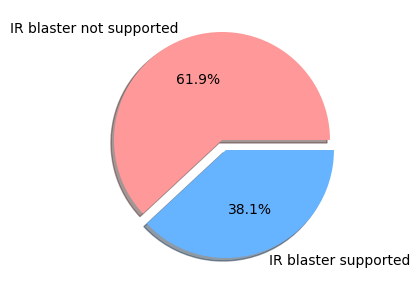

In [31]:
label = {0:"IR blaster not supported",1:"IR blaster supported"}
counts = df.has_ir_blaster.value_counts().index
colors = ["#ff9999", "#66b3ff"] 
plt.figure(figsize= (4,3))
plt.pie(
    df.has_ir_blaster.value_counts().values,
    labels= [label[i] for i in counts],
    autopct= "%0.1f%%",
    shadow= True,
    colors = colors,
    explode= [0.05,0.05]
)
plt.tight_layout()
plt.show()

In [32]:
df.has_ir_blaster.isna().sum().item()

0

### processor_brand

In [33]:
df.processor_brand.value_counts()

processor_brand
Dimensity       392
Snapdragon      368
Exynos           53
Unknown          49
Apple-Bionic     41
Unisoc           41
Helio            40
Tensor           18
Google            4
Kirin             4
Amd               2
Tiger             1
Xring             1
Name: count, dtype: int64

In [34]:
# distribution percentage wise
round(df.processor_brand.value_counts(normalize= True)*100,2)

processor_brand
Dimensity       38.66
Snapdragon      36.29
Exynos           5.23
Unknown          4.83
Apple-Bionic     4.04
Unisoc           4.04
Helio            3.94
Tensor           1.78
Google           0.39
Kirin            0.39
Amd              0.20
Tiger            0.10
Xring            0.10
Name: proportion, dtype: float64

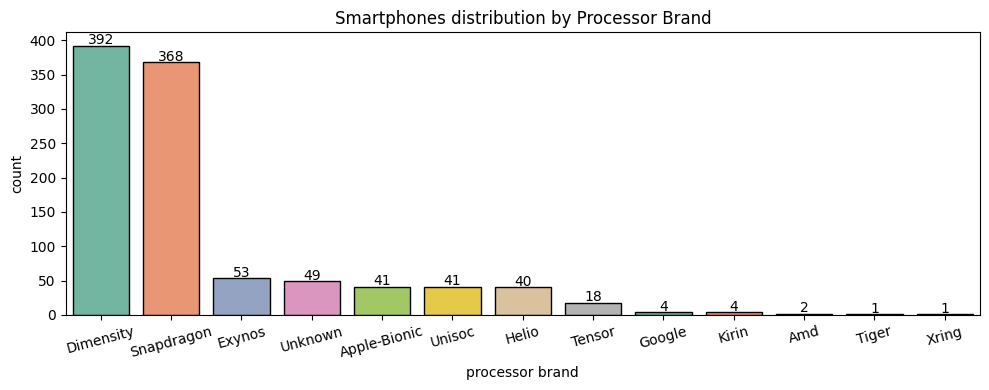

In [35]:
# bar plot
plt.figure(figsize= (10,4))
sns.barplot(
    x= df.processor_brand.value_counts().index,
    y= df.processor_brand.value_counts().values,
    color= "pink", 
    edgecolor= "k",
    palette="Set2"
)

for i,j in enumerate(df.processor_brand.value_counts().values):
    plt.text(i,j+2,j, ha= "center")

plt.title("Smartphones distribution by Processor Brand")
plt.xlabel("processor brand")
plt.ylabel("count")
plt.xticks(rotation= 15)
plt.tight_layout()
plt.show()

In [36]:
# checking for missing value
df.processor_brand.isna().sum().item()

0

### Processor speed

In [37]:
df.processor_speed.describe()

count    863.000000
mean       2.738104
std        0.613904
min        0.512000
25%        2.400000
50%        2.500000
75%        3.200000
max        4.470000
Name: processor_speed, dtype: float64

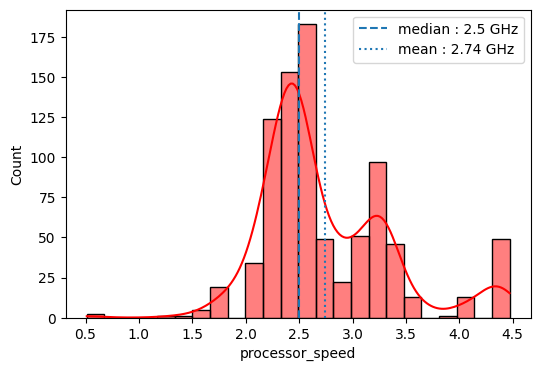

In [38]:
# understanding the distribution

plt.figure(figsize= (6,4))
sns.histplot(df.processor_speed,
            color= "red", kde= True)
plt.axvline(df.processor_speed.median(),linestyle= "--", label= f"median : {df.processor_speed.median()} GHz")
plt.axvline(df.processor_speed.mean(), linestyle= ":", label= f"mean : {round(df.processor_speed.mean(),2)} GHz")
plt.legend()
plt.show()

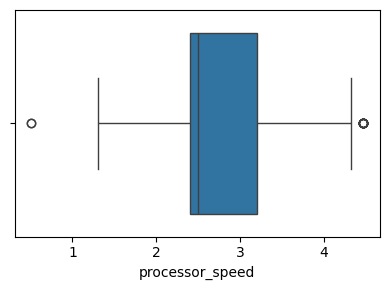

In [39]:
# box-plot (out lier detection)
plt.figure(figsize= (4,3))
sns.boxplot(
    x= df.processor_speed
)
plt.tight_layout()
plt.show()

In [40]:
# skewness
df.processor_speed.skew().item()

0.9468914787789802

In [41]:
# missing values
df.processor_speed.isna().sum().item()

151

### processor_cores

In [42]:
df.processor_cores.value_counts()

processor_cores
8.0     951
6.0      37
10.0     11
9.0       4
4.0       4
Name: count, dtype: int64

In [43]:
#  distribution percentage wise
round(df.processor_cores.value_counts(normalize= True)*100,2)

processor_cores
8.0     94.44
6.0      3.67
10.0     1.09
9.0      0.40
4.0      0.40
Name: proportion, dtype: float64

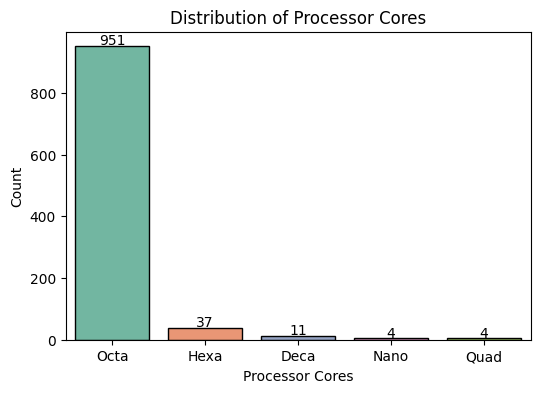

In [44]:
label = {4:"Quad",6:"Hexa",8:"Octa",9:"Nano",10:"Deca"}
counts = df.processor_cores.value_counts().rename(index=label)

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="Set2", edgecolor= "k")

for i,j in enumerate(df.processor_cores.value_counts().values):
    plt.text(i,j+5,j, ha= "center")

plt.ylabel("Count")
plt.xlabel("Processor Cores")
plt.title("Distribution of Processor Cores")
plt.show()


In [45]:
df.processor_cores.isna().sum().item()

7

### ram

In [46]:
df.ram.value_counts()

ram
8     460
12    270
6     114
4     106
16     51
3       6
2       5
24      2
Name: count, dtype: int64

In [47]:
# percentage wise distribution
round(df.ram.value_counts(normalize= True)*100,2)

ram
8     45.36
12    26.63
6     11.24
4     10.45
16     5.03
3      0.59
2      0.49
24     0.20
Name: proportion, dtype: float64

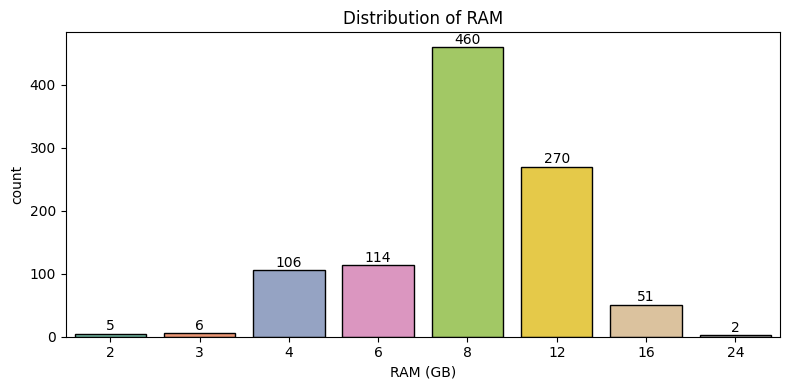

In [48]:
# bar plot
plt.figure(figsize= (8,4))
sns.barplot(
    x= df.ram.value_counts().index,
    y= df.ram.value_counts().values,
    palette= "Set2",
    edgecolor= "k"
)

for i,j in enumerate(df.ram.value_counts().sort_index().values):
    plt.text(i,j+5,j, ha= "center")

plt.title("Distribution of RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [49]:
df.ram.isna().sum().item()

0

### storage(Gb)

In [50]:
df['storage(Gb)'].value_counts()

storage(Gb)
256     429
128     422
512      97
64       48
1024     12
32        3
16        2
2048      1
Name: count, dtype: int64

In [51]:
# distribution percentage wise
round(df['storage(Gb)'].value_counts(normalize= True)*100,2)

storage(Gb)
256     42.31
128     41.62
512      9.57
64       4.73
1024     1.18
32       0.30
16       0.20
2048     0.10
Name: proportion, dtype: float64

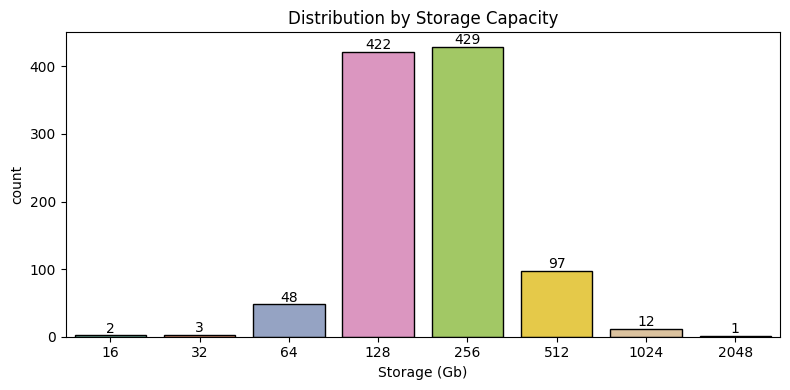

In [52]:
# bar plot
plt.figure(figsize= (8,4))
sns.barplot(
    x= df['storage(Gb)'].value_counts().index,
    y= df['storage(Gb)'].value_counts().values,
    palette= "Set2",
    edgecolor= "k"
)

for i,j in enumerate(df['storage(Gb)'].value_counts().sort_index().values):
    plt.text(i,j+4,j, ha= "center")

plt.title("Distribution by Storage Capacity")
plt.xlabel("Storage (Gb)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [53]:
df['storage(Gb)'].isna().sum().item()

0

### battery_capacity

In [54]:
df.battery_capacity.describe()

count     1007.000000
mean      5590.603774
std       1444.725524
min       2000.000000
25%       5000.000000
50%       5200.000000
75%       6000.000000
max      28000.000000
Name: battery_capacity, dtype: float64

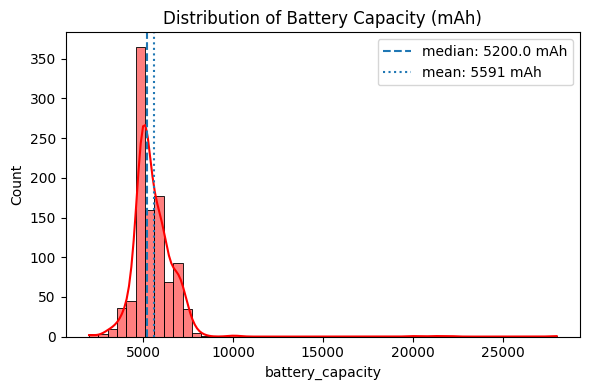

In [55]:
plt.figure(figsize= (6,4))
sns.histplot(
    x= df.battery_capacity,
    bins= 50,
    kde= True,
    color= "red"
)
plt.axvline(df.battery_capacity.median(), linestyle= "--", label= f"median: {df.battery_capacity.median()} mAh")
plt.axvline(df.battery_capacity.mean(), linestyle= ":", label= f"mean: {round(df.battery_capacity.mean())} mAh")
plt.title("Distribution of Battery Capacity (mAh)")
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
df.battery_capacity.skew().item()
# highly right skewed

7.463290009023103

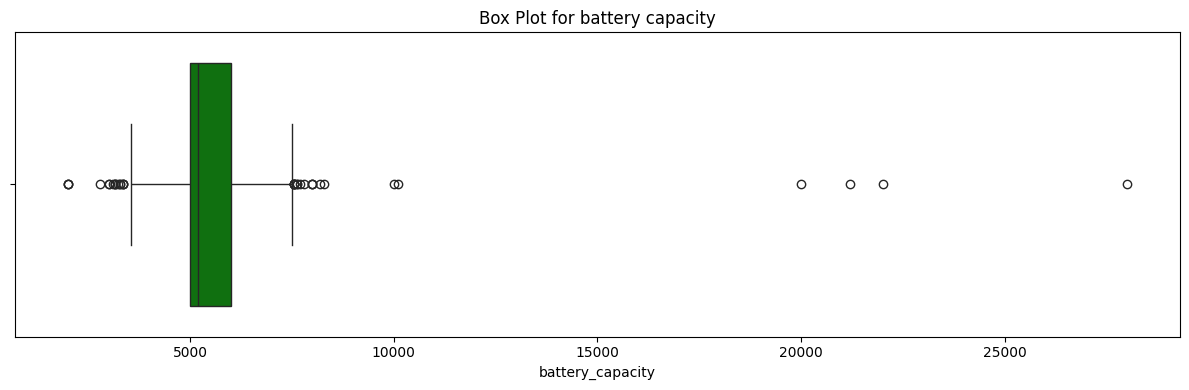

In [57]:
#  box-plot (detecting outliers)

plt.figure(figsize= (12,4))
sns.boxplot(
    x= df.battery_capacity,
    color= "green"
)
plt.title("Box Plot for battery capacity")
plt.tight_layout()
plt.show()

In [58]:
df.battery_capacity.isna().sum().item()

7

### is fast charging

In [59]:
df.is_fast_charging.value_counts()

is_fast_charging
1    996
0     18
Name: count, dtype: int64

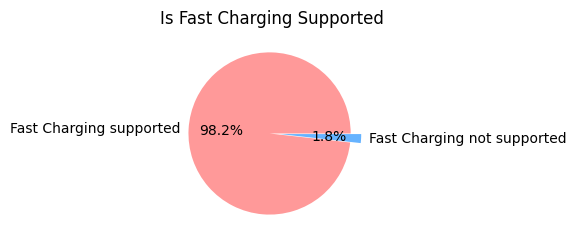

In [60]:
# pie chart
label= {0:"Fast Charging not supported",1:"Fast Charging supported"}
counts= df.is_fast_charging.value_counts().index 
colors = ["#ff9999", "#66b3ff"] 

plt.figure(figsize= (5,4))
plt.pie(
    df.is_fast_charging.value_counts().values,
    labels= [label[i] for i in counts],
    autopct = "%0.1f%%",
    explode= [0.03,0.1],
    colors = colors
)
plt.title("Is Fast Charging Supported")
plt.tight_layout()
plt.show()

In [61]:
df.is_fast_charging.isna().sum().item()

0

### charging_power

In [62]:
# top 10 most common charging power of phone chargers
df.charging_power.value_counts().head(10)

charging_power
45.0     149
80.0     144
25.0      90
33.0      77
100.0     75
90.0      68
18.0      56
120.0     46
44.0      41
15.0      34
Name: count, dtype: int64

In [63]:
# percentage wise distribution
df.charging_power.value_counts(normalize= True).head(10)*100

charging_power
45.0     15.767196
80.0     15.238095
25.0      9.523810
33.0      8.148148
100.0     7.936508
90.0      7.195767
18.0      5.925926
120.0     4.867725
44.0      4.338624
15.0      3.597884
Name: proportion, dtype: float64

In [64]:
df.charging_power.describe()

count     945.00000
mean       59.70582
std        45.90798
min        10.00000
25%        33.00000
50%        45.00000
75%        80.00000
max      1000.00000
Name: charging_power, dtype: float64

In [65]:
# bar chart


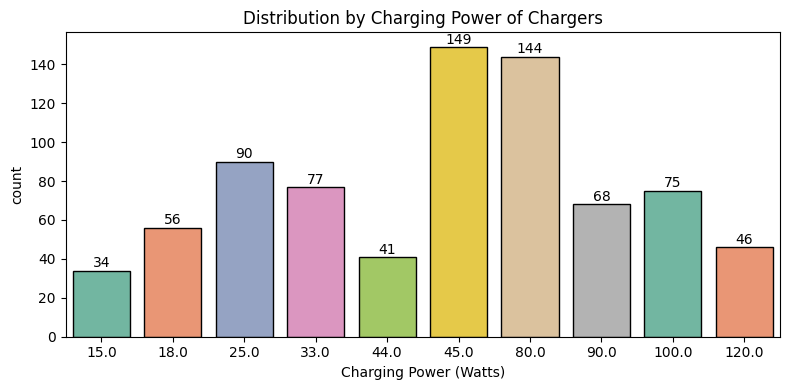

In [66]:
plt.figure(figsize= (8,4))
sns.barplot(
    x= df['charging_power'].value_counts().head(10).index,
    y= df['charging_power'].value_counts().head(10).values,
    palette= "Set2",
    edgecolor= "k"
)

for i,j in enumerate(df['charging_power'].value_counts().head(10).sort_index().values):
    plt.text(i,j+1.7,j, ha= "center")

plt.title("Distribution by Charging Power of Chargers")
plt.xlabel("Charging Power (Watts)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

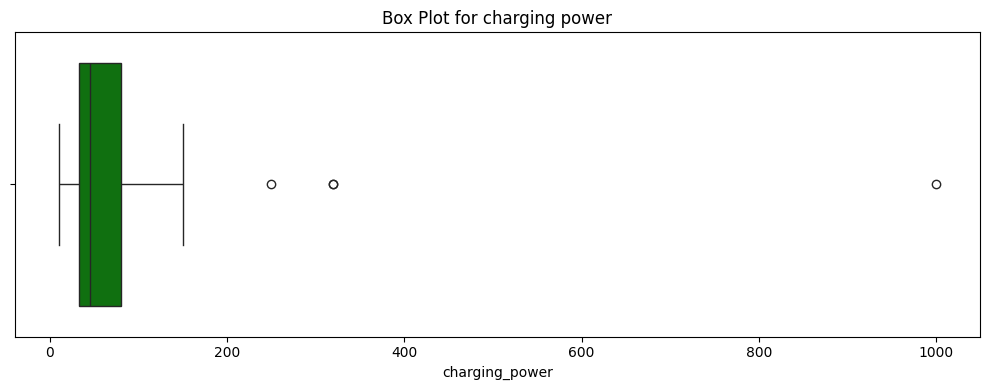

In [67]:
#  box-plot (detecting outliers)

plt.figure(figsize= (10,4))
sns.boxplot(
    x= df.charging_power,
    color= "green"
)
plt.title("Box Plot for charging power")
plt.tight_layout()
plt.show()

In [68]:
# checking for out liers
# IQR = 75th percentile - 25th percentile
#     = 80 - 33
IQR  = 47
upper_whisker = 80 + 1.5*IQR

df[df.charging_power.gt(upper_whisker)][["brand","model","is_fast_charging","charging_power"]]

,brand,model,is_fast_charging,charging_power
97,Realme,Realme GT 8 Pro,1,320.0
185,Realme,Realme GT 10000 mAh,1,320.0
587,Xiaomi,Xiaomi 17 Ultra,1,1000.0
776,Iqoo,iQOO 13 Pro,1,250.0


In [69]:
df.charging_power.isna().sum().item()

69

### display size

In [70]:
df.display_size.value_counts().head(5)

display_size
6.67    169
6.70    146
6.78    142
6.77     59
6.80     51
Name: count, dtype: int64

In [71]:
#  percentage wise weitage of most common dispaly sizes
round(df.display_size.value_counts(normalize=True).head(5)*100,2)

display_size
6.67    16.67
6.70    14.40
6.78    14.00
6.77     5.82
6.80     5.03
Name: proportion, dtype: float64

In [72]:
# statistacial summary
df.display_size.describe()

count    1014.000000
mean        6.698688
std         0.381877
min         3.000000
25%         6.670000
50%         6.700000
75%         6.780000
max        10.800000
Name: display_size, dtype: float64

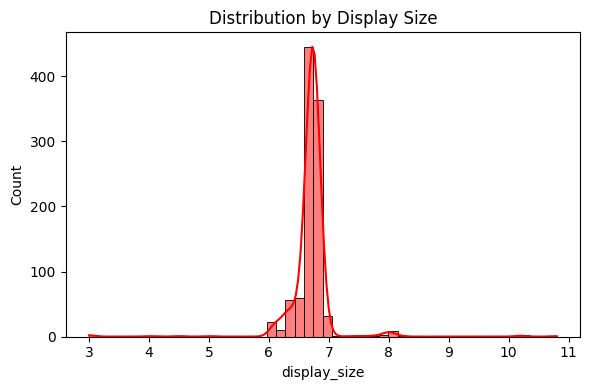

In [73]:
# Visualizing the distribution of screen sizes
plt.figure(figsize= (6,4))
sns.histplot(
    x= df.display_size,
    bins= 50,
    color= "red",
    kde= True
)
plt.title("Distribution by Display Size")
plt.tight_layout()
plt.show()

In [74]:
# skewness
round(df.display_size.skew().item(),2)

-0.14

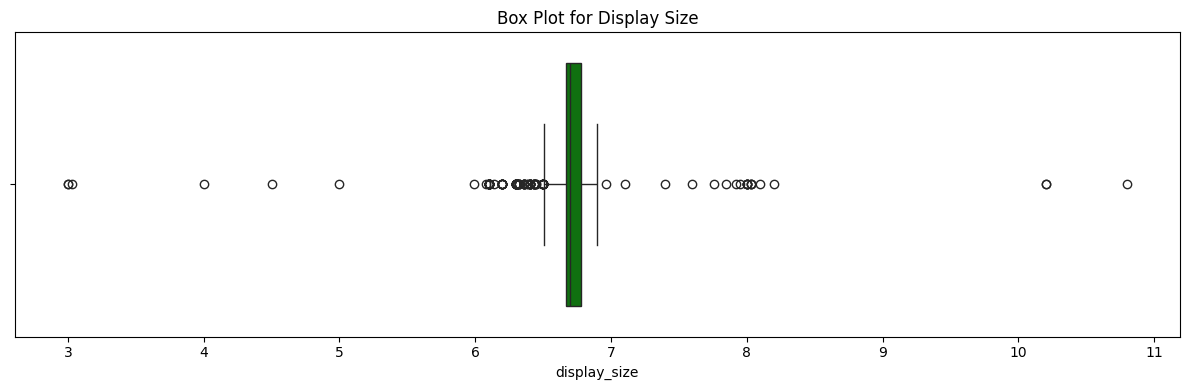

In [75]:
# Box-Plot (detecting Outliers)
plt.figure(figsize= (12,4))
sns.boxplot(
    x= df.display_size, color= "green"
)
plt.title("Box Plot for Display Size")
plt.tight_layout()
plt.show()

In [76]:
# checking for missing value
df.display_size.isna().sum().item()

0

In [77]:
#  Creating aspect_ratio column:

def aspect_ratio(row):
    height= row["resolution_height"]
    width = row["resolution_width"]
    if isinstance(height,(int,float)) and isinstance(width,(int,float)):
        return f"{height}x{width}"
    else:
        return np.nan

In [78]:
df.insert(20, "aspect_ratio",df.apply(aspect_ratio, axis=1) )

In [79]:
df[["model","resolution_height","resolution_width","aspect_ratio"]]

,model,resolution_height,resolution_width,aspect_ratio
0,Oppo F31 Pro 5G,2372.0,1080.0,2372.0x1080.0
1,Vivo Y500 5G,2392.0,1080.0,2392.0x1080.0
2,Oppo F31 5G,2412.0,1080.0,2412.0x1080.0
3,Oppo F31 Pro Plus 5G,2800.0,1280.0,2800.0x1280.0
4,Apple iPhone 17,2622.0,1206.0,2622.0x1206.0
...,...,...,...,...
1009,Lava Blaze Duo (8GB RAM + 128GB),2400.0,1080.0,2400.0x1080.0
1010,OnePlus Ace 5s,2780.0,1264.0,2780.0x1264.0
1011,Lava O3 Pro,1600.0,720.0,1600.0x720.0
1012,Realme Note 60x,1600.0,720.0,1600.0x720.0


In [80]:
# Creating ppi column:

def ppi(row):
    height = row["resolution_height"]
    width = row["resolution_width"]
    size = row["display_size"]
    if isinstance(height,(int,float)) and isinstance(width,(int,float)) and isinstance(size,(int,float)):
        ppi= ((height**2 + width**2)**0.5)/(size)
        return round(ppi,1)
    else: 
        return np.nan

In [81]:
df.insert(21,"ppi",df.apply(ppi, axis= 1))  

In [82]:
df[["model","resolution_height","resolution_width","display_size","ppi"]]

,model,resolution_height,resolution_width,display_size,ppi
0,Oppo F31 Pro 5G,2372.0,1080.0,6.57,396.7
1,Vivo Y500 5G,2392.0,1080.0,6.77,387.7
2,Oppo F31 5G,2412.0,1080.0,6.57,402.2
3,Oppo F31 Pro Plus 5G,2800.0,1280.0,6.80,452.8
4,Apple iPhone 17,2622.0,1206.0,6.30,458.1
...,...,...,...,...,...
1009,Lava Blaze Duo (8GB RAM + 128GB),2400.0,1080.0,6.67,394.6
1010,OnePlus Ace 5s,2780.0,1264.0,6.78,450.4
1011,Lava O3 Pro,1600.0,720.0,6.56,267.5
1012,Realme Note 60x,1600.0,720.0,6.74,260.3


### aspect_ratio

In [83]:
#  most common aspect ratio
df.aspect_ratio.value_counts().head()

aspect_ratio
2400.0x1080.0    149
2340.0x1080.0     86
1600.0x720.0      85
2392.0x1080.0     63
2800.0x1260.0     56
Name: count, dtype: int64

In [84]:
#  percentage wise distribution
round(df.aspect_ratio.value_counts(normalize= True).head()*100,1)

aspect_ratio
2400.0x1080.0    14.7
2340.0x1080.0     8.5
1600.0x720.0      8.4
2392.0x1080.0     6.2
2800.0x1260.0     5.5
Name: proportion, dtype: float64

In [85]:
df.aspect_ratio.isna().sum().item()

0

### ppi

In [86]:
df.ppi.describe()

count    1010.000000
mean      397.519010
std        71.226551
min       146.900000
25%       387.700000
50%       394.600000
75%       450.400000
max       623.200000
Name: ppi, dtype: float64

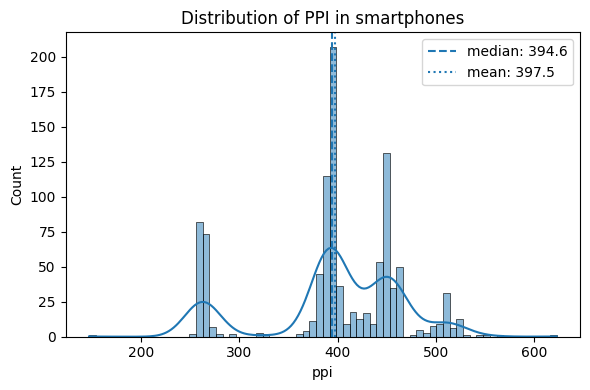

In [87]:
plt.figure(figsize= (6,4))
sns.histplot(
    x= df.ppi,
    bins= 70,
    kde= True
)
plt.title("Distribution of PPI in smartphones")
plt.axvline(df.ppi.median(), linestyle= "--", label= f"median: {df.ppi.median()}")
plt.axvline(df.ppi.mean(), linestyle= ":", label= f"mean: {round(df.ppi.mean(),1)}")
plt.legend()
plt.tight_layout()
plt.show()

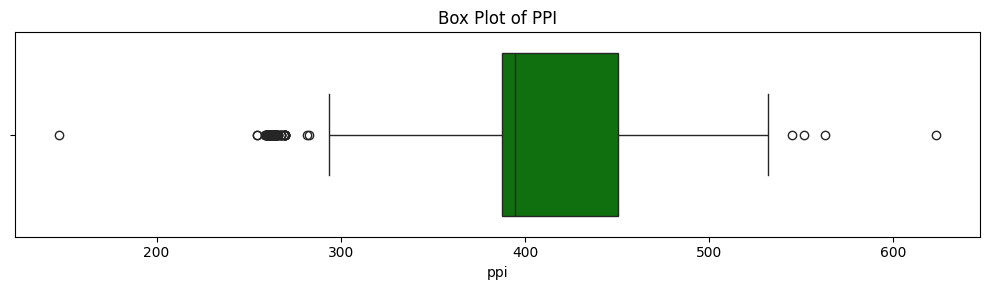

In [88]:
# Box-Plot
plt.figure(figsize= (10,3))
sns.boxplot(
    x= df.ppi,
    color= "green"
)
plt.title("Box Plot of PPI")
plt.tight_layout()
plt.show()

In [89]:
df.ppi.isna().sum().item()

4

### refresh_rate

In [90]:
df.refresh_rate.value_counts()

refresh_rate
120.0    710
144.0    132
90.0      84
165.0     11
185.0      2
Name: count, dtype: int64

In [91]:
# distribution in percentage
round(df.refresh_rate.value_counts(normalize= True)*100,1)

refresh_rate
120.0    75.6
144.0    14.1
90.0      8.9
165.0     1.2
185.0     0.2
Name: proportion, dtype: float64

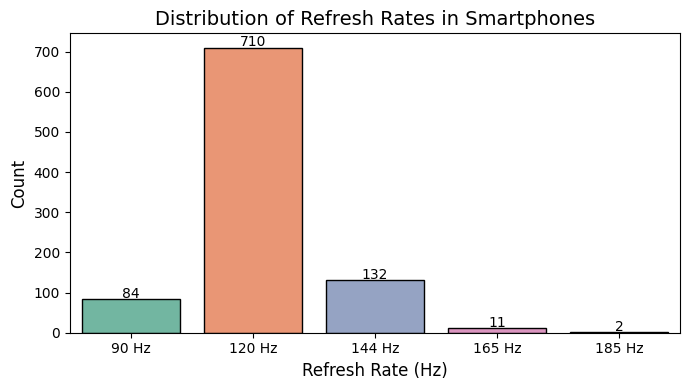

In [92]:
refresh_counts = df.refresh_rate.value_counts().sort_index()

plt.figure(figsize=(7,4))
sns.barplot(
    x=df.refresh_rate.value_counts().index,
    y=df.refresh_rate.value_counts().values,
    palette="Set2",
    edgecolor="k"
)

# Annotating values on top of bars
for i, j in enumerate(df.refresh_rate.value_counts().sort_index().values):
    plt.text(i, j+3, str(j), ha="center")

plt.title("Distribution of Refresh Rates in Smartphones", fontsize=14)
plt.xlabel("Refresh Rate (Hz)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(range(len(refresh_counts.index)), [f"{int(val)} Hz" for val in refresh_counts.index])
plt.tight_layout()
plt.show()



In [93]:
df.refresh_rate.isna().sum().item()

75

### rear_camera_count

In [94]:
df.rear_camera_count.value_counts().sort_index()

rear_camera_count
1    151
2    447
3    416
Name: count, dtype: int64

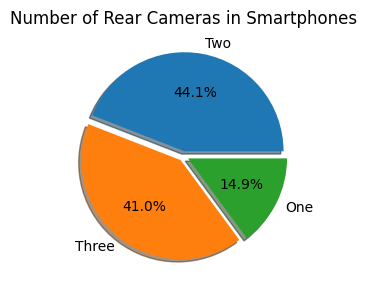

In [95]:
label= {1:"One",2:"Two",3:"Three"}
counts= df.rear_camera_count.value_counts().index

plt.figure(figsize= (4,3))
plt.pie(
    df.rear_camera_count.value_counts().values,
    labels= [label[i] for i in counts],
    autopct= "%0.1f%%",
    shadow= True,
    explode= [0.05,0.05,0.05]
)
plt.title("Number of Rear Cameras in Smartphones")
plt.tight_layout()
plt.show()

In [96]:
df.rear_camera_count.isna().sum().item()

0

### front_camera_count

In [97]:
df.front_camera_count.value_counts()

front_camera_count
1.0    990
2.0     20
Name: count, dtype: int64

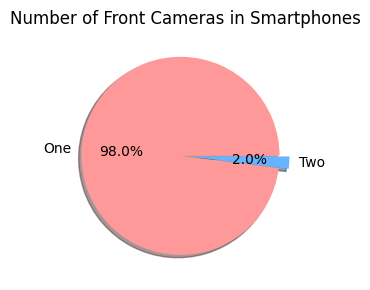

In [98]:
label= {1:"One",2:"Two"}
counts= df.front_camera_count.value_counts().index
colors = ["#ff9999", "#66b3ff"] 
plt.figure(figsize= (4,3))
plt.pie(
    df.front_camera_count.value_counts().values,
    labels= [label[i] for i in counts],
    autopct= "%0.1f%%",
    shadow= True,
    explode= [0.05,0.05],
    colors = colors
)
plt.title("Number of Front Cameras in Smartphones")
plt.tight_layout()
plt.show()

In [99]:
df.front_camera_count.isna().sum().item()

4

### rear_primary_mp

In [100]:
df.rear_primary_mp.value_counts()

rear_primary_mp
50.0     720
64.0      70
48.0      58
108.0     48
200.0     42
13.0      30
32.0      18
12.0      11
8.0        7
5.0        3
100.0      2
12.2       1
60.0       1
16.0       1
20.0       1
50.3       1
Name: count, dtype: int64

In [101]:
# percentage wise distribution:
round(df.rear_primary_mp.value_counts(normalize= True)*100,2)

rear_primary_mp
50.0     71.01
64.0      6.90
48.0      5.72
108.0     4.73
200.0     4.14
13.0      2.96
32.0      1.78
12.0      1.08
8.0       0.69
5.0       0.30
100.0     0.20
12.2      0.10
60.0      0.10
16.0      0.10
20.0      0.10
50.3      0.10
Name: proportion, dtype: float64

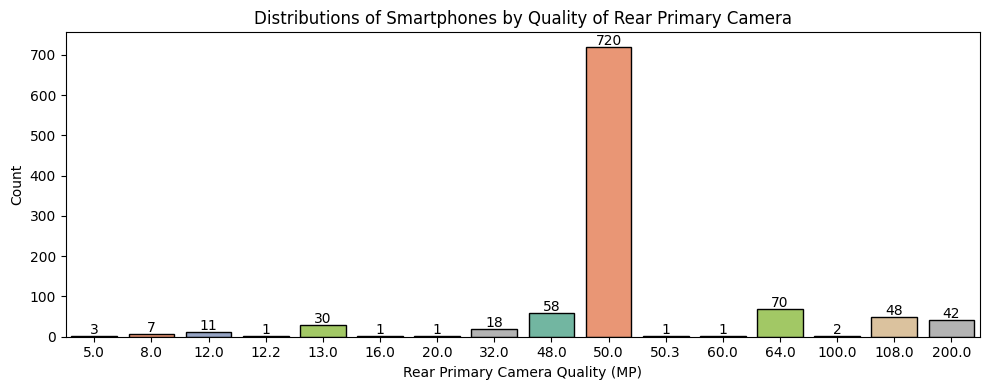

In [102]:
plt.figure(figsize= (10,4))
sns.barplot(
    x= df.rear_primary_mp.value_counts().sort_index().index,
    y = df.rear_primary_mp.value_counts().sort_index().values,
    edgecolor= "k",
    palette = "Set2"
)

for i,j in enumerate(df.rear_primary_mp.value_counts().sort_index().values):
    plt.text(i,j+5,j, ha= "center")

plt.title("Distributions of Smartphones by Quality of Rear Primary Camera")
plt.xlabel("Rear Primary Camera Quality (MP)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [103]:
df.rear_primary_mp.isna().sum().item()

0

### front_primary_mp

In [104]:
df.front_primary_mp.value_counts()

front_primary_mp
32.0    225
16.0    195
50.0    157
8.0     141
13.0     76
12.0     64
5.0      62
20.0     34
10.0     18
18.0     13
10.5      5
42.0      4
60.0      3
24.0      3
10.8      2
11.1      2
40.0      1
2.0       1
50.3      1
10.7      1
Name: count, dtype: int64

In [105]:
# percentage wise distribution:
round(df.front_primary_mp.value_counts(normalize= True)*100,2)

front_primary_mp
32.0    22.32
16.0    19.35
50.0    15.58
8.0     13.99
13.0     7.54
12.0     6.35
5.0      6.15
20.0     3.37
10.0     1.79
18.0     1.29
10.5     0.50
42.0     0.40
60.0     0.30
24.0     0.30
10.8     0.20
11.1     0.20
40.0     0.10
2.0      0.10
50.3     0.10
10.7     0.10
Name: proportion, dtype: float64

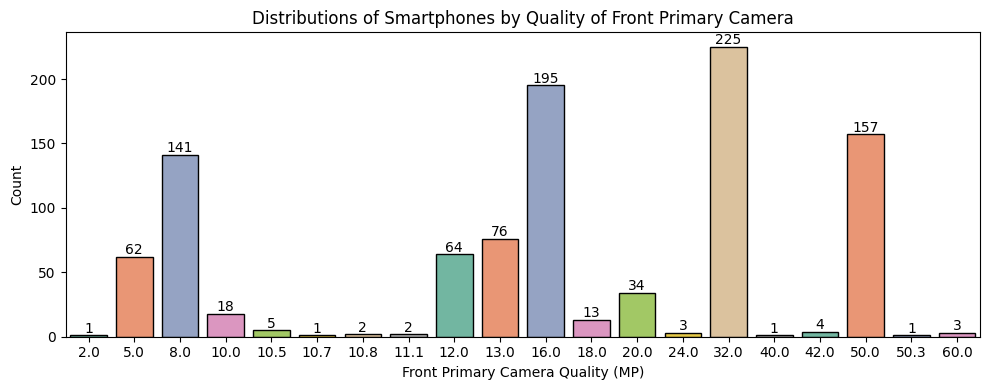

In [106]:
plt.figure(figsize= (10,4))
sns.barplot(
    x= df.front_primary_mp.value_counts().sort_index().index,
    y = df.front_primary_mp.value_counts().sort_index().values,
    edgecolor= "k",
    palette = "Set2"
)

for i,j in enumerate(df.front_primary_mp.value_counts().sort_index().values):
    plt.text(i,j+2,j, ha= "center")

plt.title("Distributions of Smartphones by Quality of Front Primary Camera")
plt.xlabel("Front Primary Camera Quality (MP)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [107]:
df.front_primary_mp.isna().sum().item()

6

### extended_memory_available

In [108]:
df.extended_memory_available.value_counts()

extended_memory_available
1.0    398
0.0    241
Name: count, dtype: int64

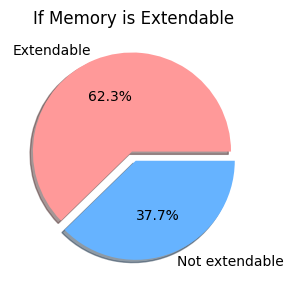

In [109]:
label= {0:"Not extendable",1:"Extendable"}
counts= df.extended_memory_available.value_counts().index
colors = ["#ff9999", "#66b3ff"] 
plt.figure(figsize= (4,3))
plt.pie(
    df.extended_memory_available.value_counts().values,
    labels= [label[i] for i in counts],
    autopct= "%0.1f%%",
    shadow= True,
    explode= [0.05,0.05],
    colors= colors
)
plt.title("If Memory is Extendable")
plt.tight_layout()
plt.show()

In [110]:
df.extended_memory_available.isna().sum().item()

375

### extended_upto

In [111]:
# removing records with nan and 0 values in extended upto column:
temp_df = df[(df.extended_upto != 0) & (~df.extended_upto.isna())]
temp_df.extended_upto.value_counts()

extended_upto
1024.00    196
2048.00     78
1536.00     12
512.00       9
256.00       5
128.00       2
1044.48      1
32.00        1
Name: count, dtype: int64

In [112]:
# share in percentage:
round(temp_df.extended_upto.value_counts(normalize= True)*100,2)

extended_upto
1024.00    64.47
2048.00    25.66
1536.00     3.95
512.00      2.96
256.00      1.64
128.00      0.66
1044.48     0.33
32.00       0.33
Name: proportion, dtype: float64

In [113]:
df.extended_upto.isna().sum().item()

469

### os

In [114]:
df.os.value_counts()

os
Android      942
iOS           41
HarmonyOS      6
Name: count, dtype: int64

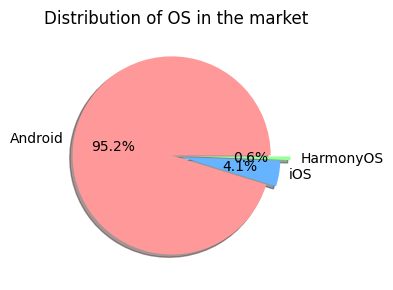

In [115]:
colors = ["#ff9999", "#66b3ff", "#99ff99"]

plt.figure(figsize= (4,3))
plt.pie(
    df.os.value_counts().values,
    labels= df.os.value_counts().index,
    autopct= "%0.1f%%",
    shadow= True,
    explode= [0.05,0.05,0.15],
    colors= colors
)
plt.title("Distribution of OS in the market")
plt.tight_layout()
plt.show()

In [116]:
df.os.isna().sum().item()

25

## Bivariate Analysis:

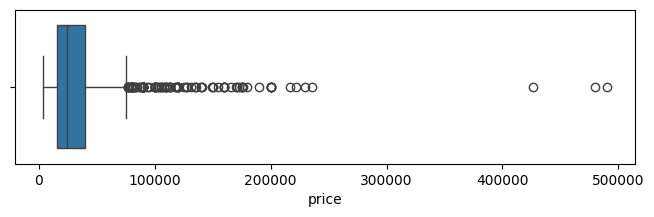

In [117]:
plt.figure(figsize= (8,2))
sns.boxplot(x= df.price)
plt.show()

In [118]:
new_df = df.copy()

In [119]:
new_df[new_df.price.gt(300000)]

,brand,model,price,rating,sim_type,has_5G,has_NFC,has_ir_blaster,processor_brand,processor_name,...,aspect_ratio,ppi,refresh_rate,rear_camera_count,front_camera_count,rear_primary_mp,front_primary_mp,extended_memory_available,extended_upto,os
522,Vertu,Vertu Metavertu 2,425999,86,Dual Sim,1,1,0,Snapdragon,Snapdragon 8 Gen2,...,2800.0x1260.0,452.9,120.0,3,1.0,50.0,16.0,0.0,0.0,Android
655,Vertu,Vertu Ironflip,489990,84,Dual Sim,1,1,0,Snapdragon,Snapdragon 8 Gen2,...,2790.0x1188.0,452.6,120.0,2,1.0,50.0,16.0,NaN,NaN,Android
795,Xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,86,Dual Sim,0,1,0,Snapdragon,Snapdragon 855,...,2340.0x1080.0,403.3,NaN,3,1.0,48.0,20.0,0.0,0.0,Android


In [120]:
new_df.drop([522,655,795], inplace= True)

### price vs ram

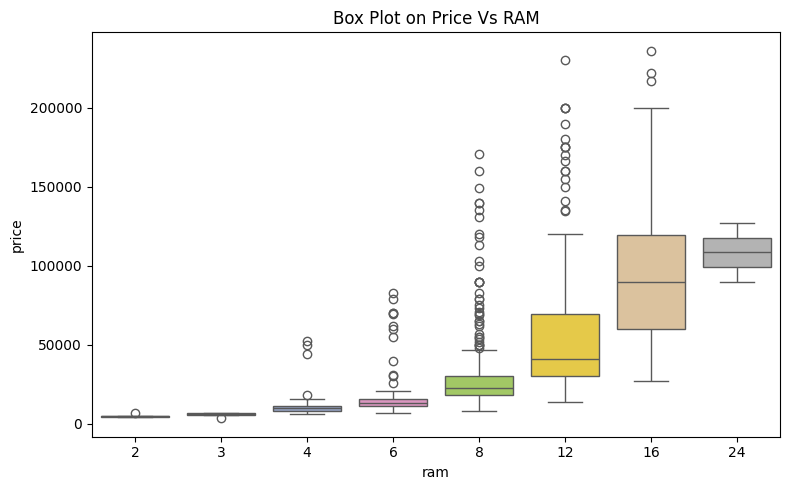

In [121]:
plt.figure(figsize= (8,5))
sns.boxplot(
    x= new_df.ram,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Box Plot on Price Vs RAM")
plt.tight_layout()
plt.show()

### Price vs Storage

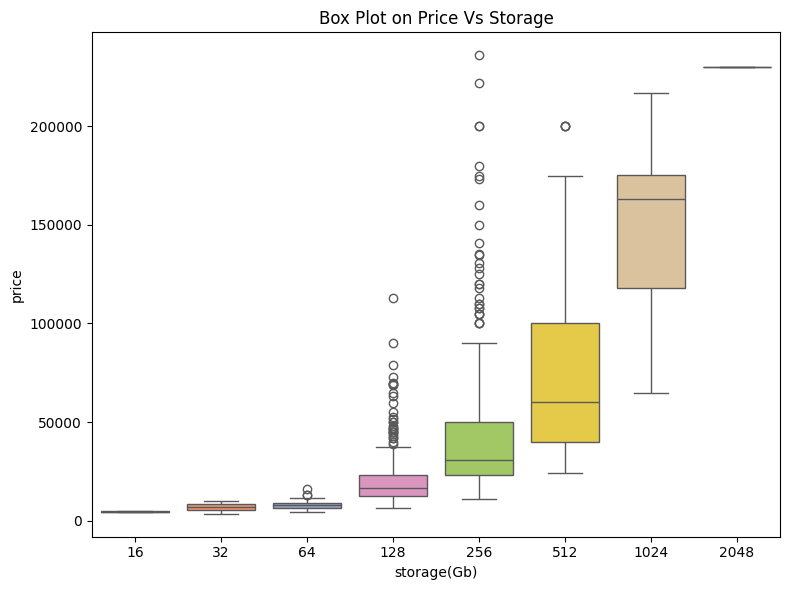

In [122]:
plt.figure(figsize= (8,6))
sns.boxplot(
    x= new_df["storage(Gb)"],
    y= new_df.price,
    palette= "Set2"
)
plt.title("Box Plot on Price Vs Storage")
plt.tight_layout()
plt.show()

### Price vs Processor speed

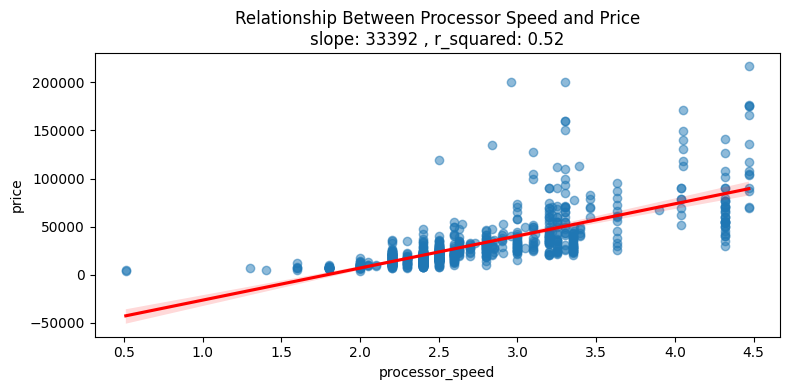

In [123]:
from scipy.stats import linregress

clean_df = new_df[["processor_speed","price"]].dropna()

plt.figure(figsize= (8,4))
sns.regplot(
    x= clean_df.processor_speed,
    y= clean_df.price,
    scatter_kws= {"alpha":0.5},
    line_kws= {"color":"red"}
)
slope, intercept, r_value, p_value, std_err = linregress(clean_df["processor_speed"],clean_df["price"])

plt.title(f"Relationship Between Processor Speed and Price\nslope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

In [124]:
corr = round(new_df["processor_speed"].corr(new_df["price"]).item(),2)
print(f"Coorelation b/w processor speed and price : {corr}")

Coorelation b/w processor speed and price : 0.72


### price vs cores

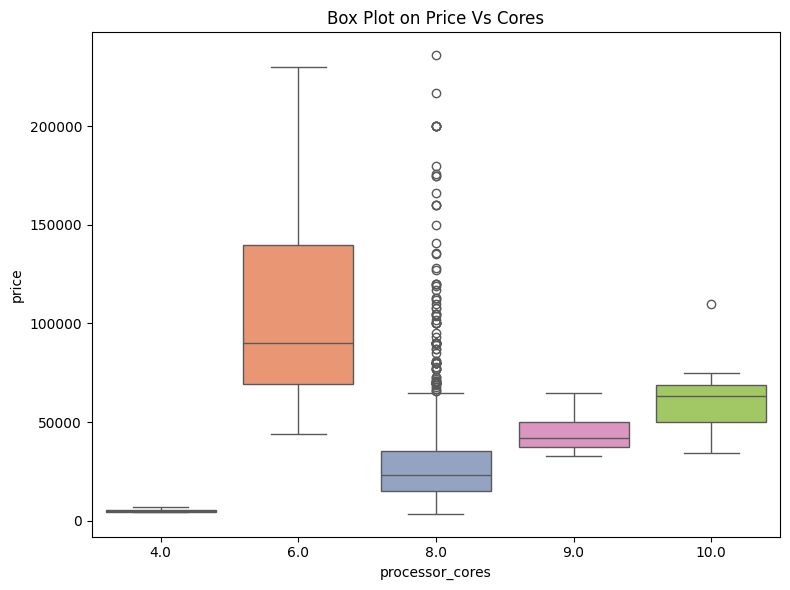

In [125]:
plt.figure(figsize= (8,6))
sns.boxplot(
    x= new_df["processor_cores"],
    y= new_df.price,
    palette= "Set2"
)
plt.title("Box Plot on Price Vs Cores")
plt.tight_layout()
plt.show()

In [176]:
pd.crosstab(new_df["processor_cores"],new_df["os"])

os,Android,HarmonyOS,iOS
processor_cores,,,
4.0,4,0,0
6.0,0,0,37
8.0,917,5,3
9.0,4,0,0
10.0,10,0,0


### price vs display size

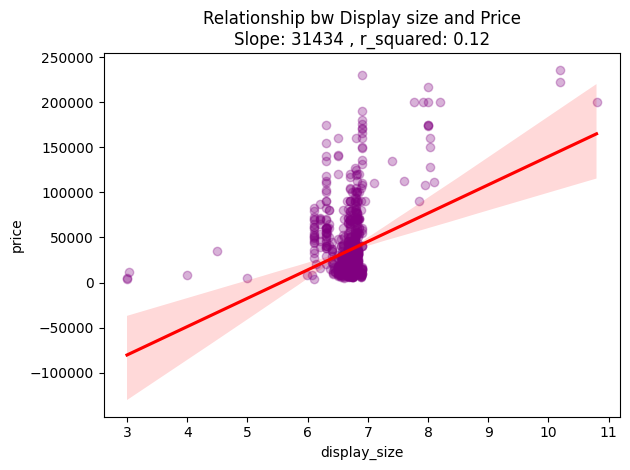

In [126]:
slope, intercept, r_value, p_value, std_err = linregress(new_df["display_size"],new_df["price"])

sns.regplot(
    x= new_df["display_size"],
    y= new_df["price"],
    scatter_kws= {"alpha":0.3, "color":"purple"},
    line_kws= {"color":"red"}
)
plt.title(f"Relationship bw Display size and Price\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

### price vs resolution width

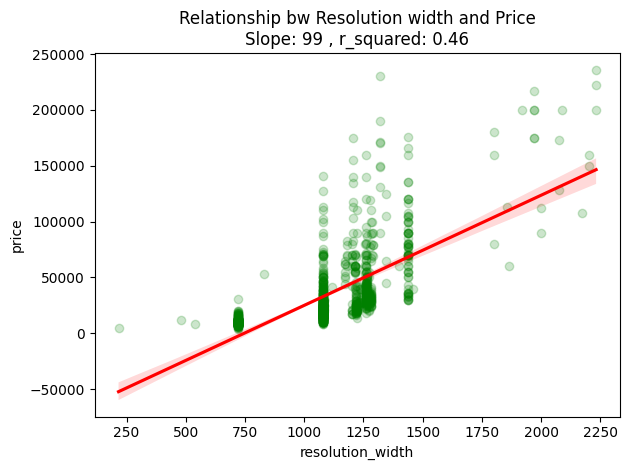

In [187]:
clean_df = new_df[["resolution_width","price"]].dropna()

slope, intercept, r_value, p_value, std_err = linregress(clean_df["resolution_width"],clean_df["price"])

sns.regplot(
    x= clean_df["resolution_width"],
    y= clean_df["price"],
    scatter_kws= {"alpha":0.2, "color":"green"},
    line_kws= {"color":"red"}
)
plt.title(f"Relationship bw Resolution width and Price\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

### price vs resolution height

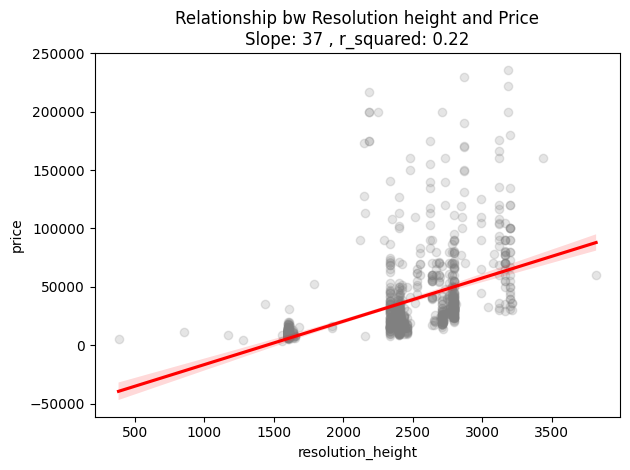

In [189]:
clean_df = new_df[["resolution_height","price"]].dropna()

slope, intercept, r_value, p_value, std_err = linregress(clean_df["resolution_height"],clean_df["price"])

sns.regplot(
    x= clean_df["resolution_height"],
    y= clean_df["price"],
    scatter_kws= {"alpha":0.2, "color":"grey"},
    line_kws= {"color":"red"}
)
plt.title(f"Relationship bw Resolution height and Price\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

### price vs ppi

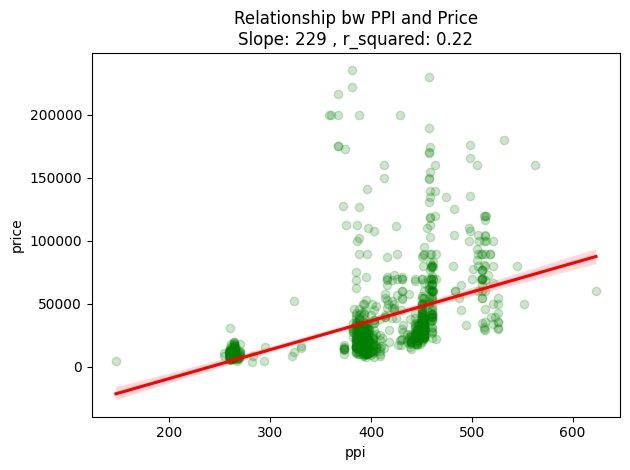

In [182]:
clean_df = new_df[["ppi","price"]].dropna()

slope, intercept, r_value, p_value, std_err = linregress(clean_df["ppi"],clean_df["price"])

sns.regplot(
    x= clean_df["ppi"],
    y= clean_df["price"],
    scatter_kws= {"alpha":0.2, "color":"green"},
    line_kws= {"color":"red"}
)
plt.title(f"Relationship bw PPI and Price\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

### price vs refresh rate

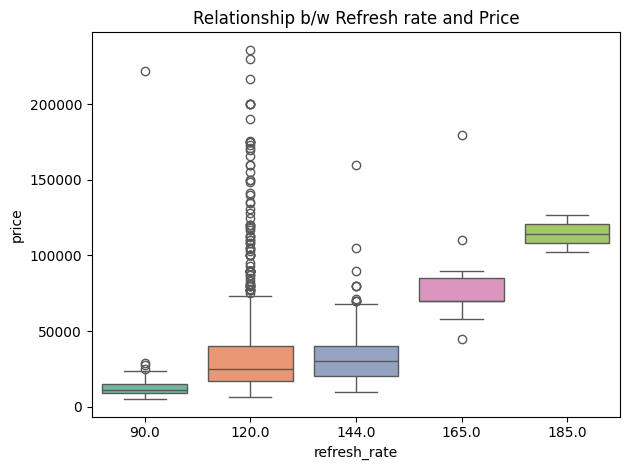

In [127]:
sns.boxplot(
   x= new_df.refresh_rate,
   y= new_df.price ,
   palette= "Set2" 
)
plt.title("Relationship b/w Refresh rate and Price")
plt.tight_layout()
plt.show()


### price vs battery capacity

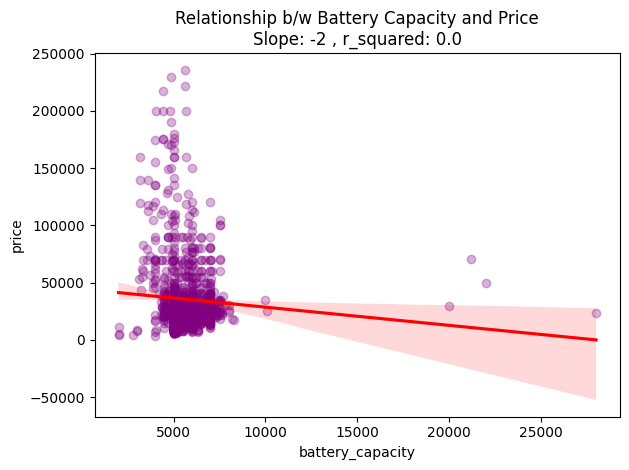

In [128]:
clean_df = new_df[["battery_capacity","price"]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(clean_df["battery_capacity"], clean_df["price"])

sns.regplot(
    x= clean_df["battery_capacity"],
    y= clean_df["price"],
    line_kws= {"color":"red"},
    scatter_kws= {"alpha":0.3, "color":"purple"}
)
plt.title(f"Relationship b/w Battery Capacity and Price\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.tight_layout()
plt.show()

### price vs has_5G

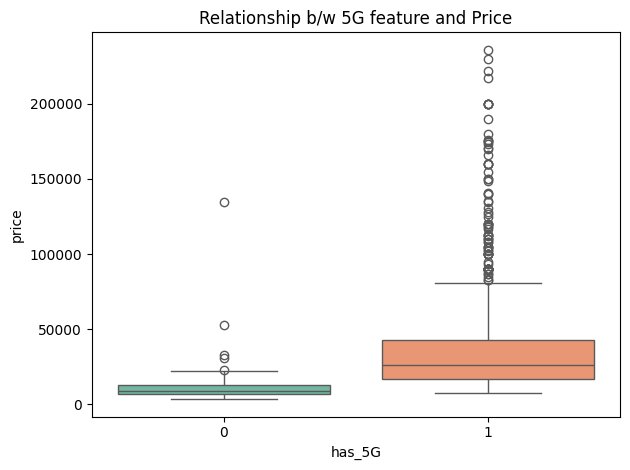

In [129]:
sns.boxplot(
    x= new_df.has_5G,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w 5G feature and Price")
plt.tight_layout()
plt.show()

### Price vs has_NFC

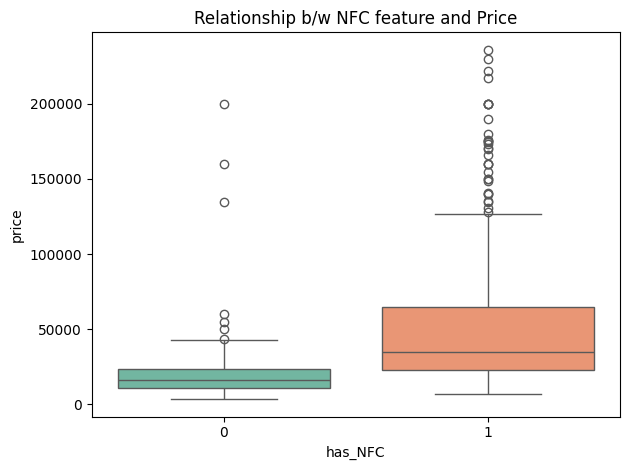

In [130]:
sns.boxplot(
    x= new_df.has_NFC,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w NFC feature and Price")
plt.tight_layout()
plt.show()

### price vs has_ir_blaster

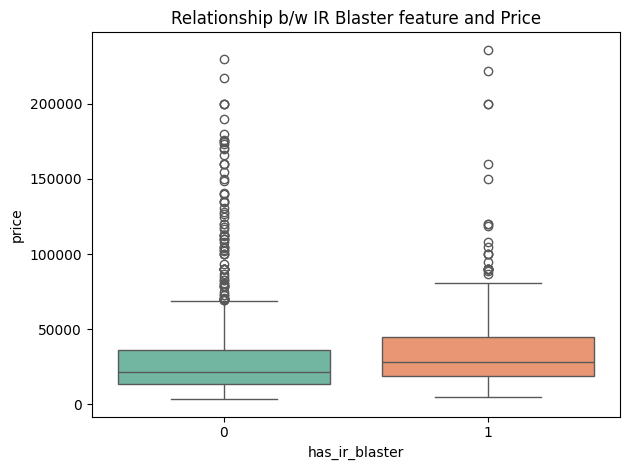

In [131]:
sns.boxplot(
    x= new_df.has_ir_blaster,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w IR Blaster feature and Price")
plt.tight_layout()
plt.show()

### price vs is_fast_charging

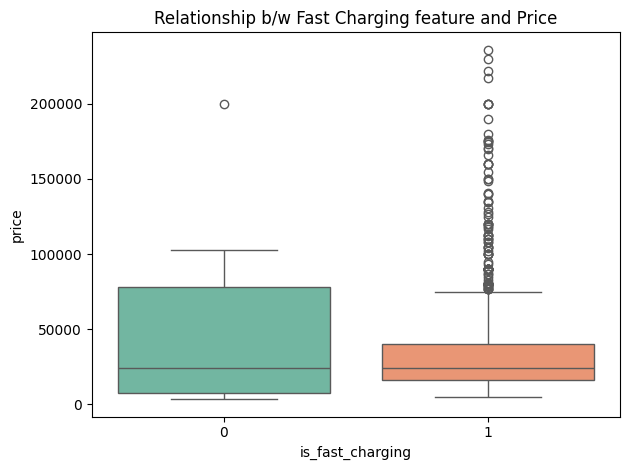

In [132]:
sns.boxplot(
    x= new_df.is_fast_charging,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w Fast Charging feature and Price")
plt.tight_layout()
plt.show()

### price vs expandable memory

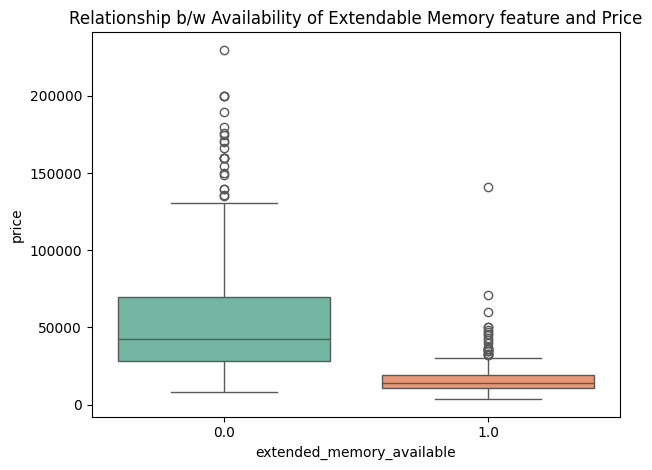

In [133]:
clean_df = new_df[["price","extended_memory_available"]].dropna()

sns.boxplot(
    x= clean_df.extended_memory_available,
    y= clean_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w Availability of Extendable Memory feature and Price")
plt.tight_layout()
plt.show()

### price vs brand

In [134]:
new_df.brand.value_counts().reset_index()

,brand,count
0,Samsung,134
1,Vivo,127
2,Realme,113
3,Oppo,79
4,Xiaomi,77
5,Motorola,59
6,Iqoo,55
7,Oneplus,52
8,Poco,43
9,Infinix,42


In [135]:
temp_df = new_df.brand.value_counts().reset_index()
temp_df_2 = temp_df[temp_df["count"] > 10].set_index("brand")

brands = temp_df_2.index.to_list()
clean_df = new_df[new_df["brand"].isin(brands)]

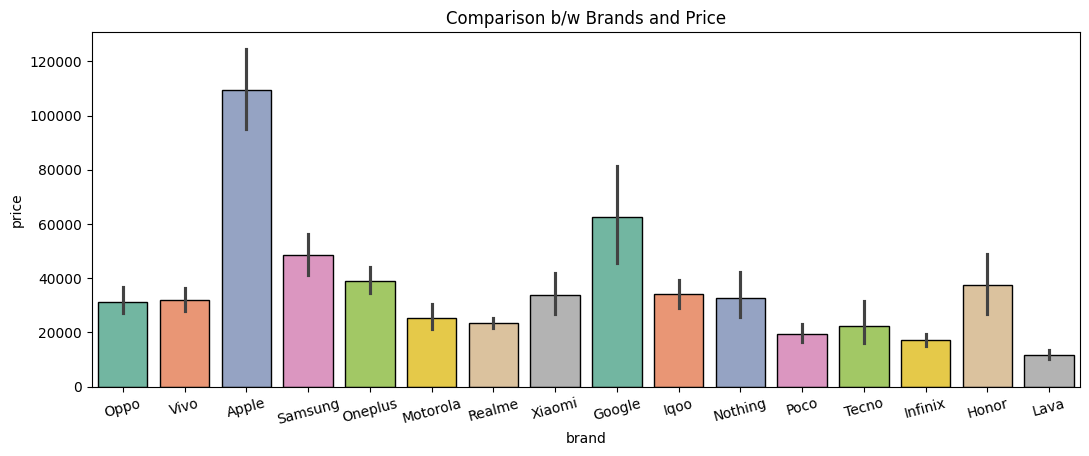

In [136]:
plt.figure(figsize= (11,4.5))
sns.barplot(
    x= clean_df.brand,
    y= clean_df.price,
    palette= "Set2",
    edgecolor= "k"
)
plt.title("Comparison b/w Brands and Price")
plt.tight_layout()
plt.xticks(rotation= 15)
plt.show()

### price vs processor brand

In [137]:
new_df.processor_brand.value_counts()
#  for better comparison we would only take those brands where count of phones is greater than 10

processor_brand
Dimensity       392
Snapdragon      365
Exynos           53
Unknown          49
Apple-Bionic     41
Unisoc           41
Helio            40
Tensor           18
Google            4
Kirin             4
Amd               2
Tiger             1
Xring             1
Name: count, dtype: int64

In [138]:
temp_df = new_df.processor_brand.value_counts().reset_index()
temp_df_2 = temp_df[temp_df["count"] > 10].set_index("processor_brand")

brands = temp_df_2.index.to_list()
brands.remove("Unknown")
clean_df = new_df[new_df["processor_brand"].isin(brands)]


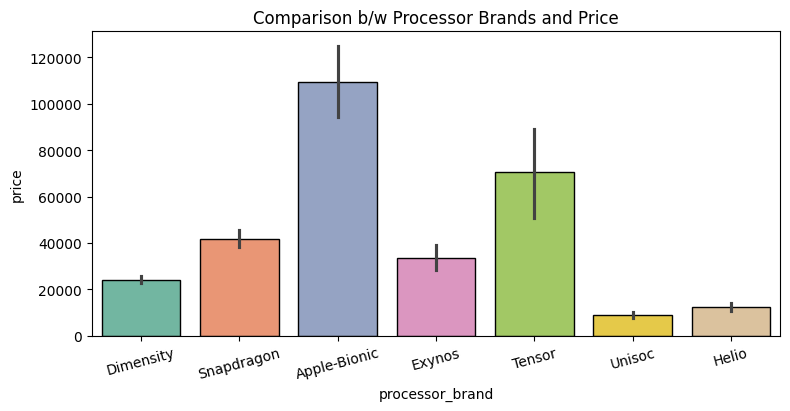

In [139]:
plt.figure(figsize= (8,4))
sns.barplot(
    x= clean_df.processor_brand,
    y= clean_df.price,
    palette= "Set2",
    edgecolor= "k"
)
plt.title("Comparison b/w Processor Brands and Price")
plt.tight_layout()
plt.xticks(rotation= 15)
plt.show()

### price vs os

In [141]:
new_df.os.value_counts()

os
Android      939
iOS           41
HarmonyOS      6
Name: count, dtype: int64

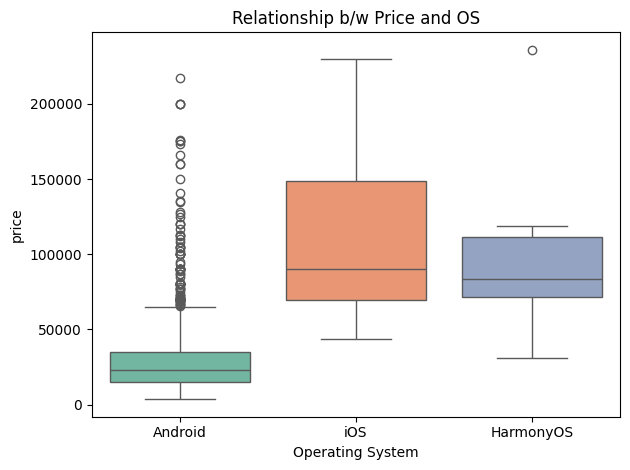

In [145]:
sns.boxplot(
    x= new_df.os,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w Price and OS")
plt.xlabel("Operating System")
plt.tight_layout()
plt.show()

### price vs sim_type

In [146]:
new_df.sim_type.value_counts()

sim_type
Dual Sim      1008
Single Sim       3
Name: count, dtype: int64

### Price vs rear_camera_count

In [149]:
new_df.rear_camera_count.value_counts()

rear_camera_count
2    446
3    414
1    151
Name: count, dtype: int64

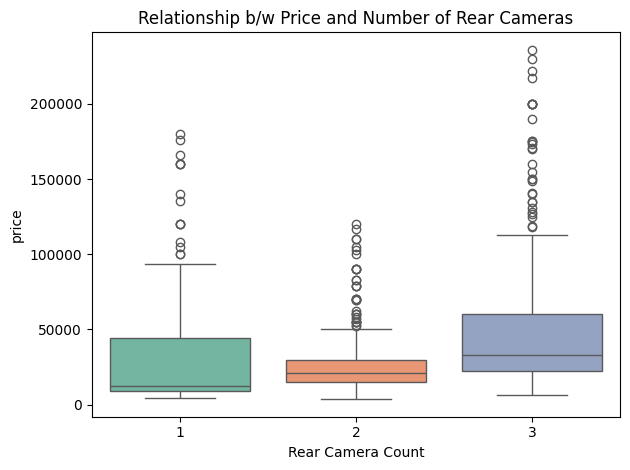

In [150]:
sns.boxplot(
    x= new_df.rear_camera_count,
    y= new_df.price,
    palette= "Set2"
)
plt.title("Relationship b/w Price and Number of Rear Cameras")
plt.xlabel("Rear Camera Count")
plt.tight_layout()
plt.show()

### price vs front_primary_mp

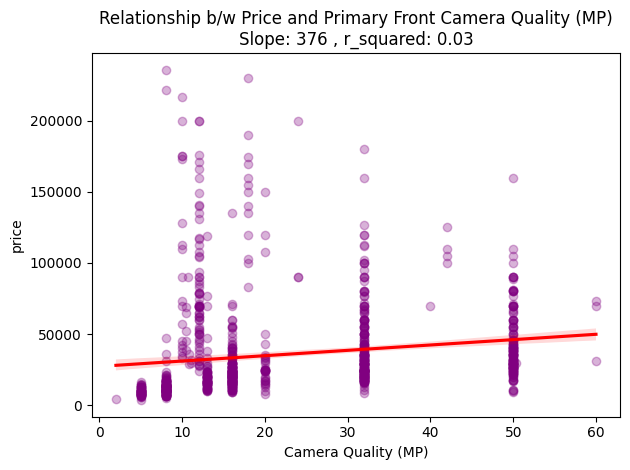

In [158]:
clean_df = new_df[["front_primary_mp","price"]].dropna()

slope, intercept, r_value, p_value, std_err = linregress(clean_df["front_primary_mp"],clean_df["price"])

sns.regplot(
    x= clean_df.front_primary_mp,
    y= clean_df.price,
    line_kws= {"color":"red"},
    scatter_kws= {"alpha":0.3,"color":"purple"}
)
plt.title(f"Relationship b/w Price and Primary Front Camera Quality (MP)\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.xlabel("Camera Quality (MP)")
plt.tight_layout()
plt.show()

### Price vs Rating

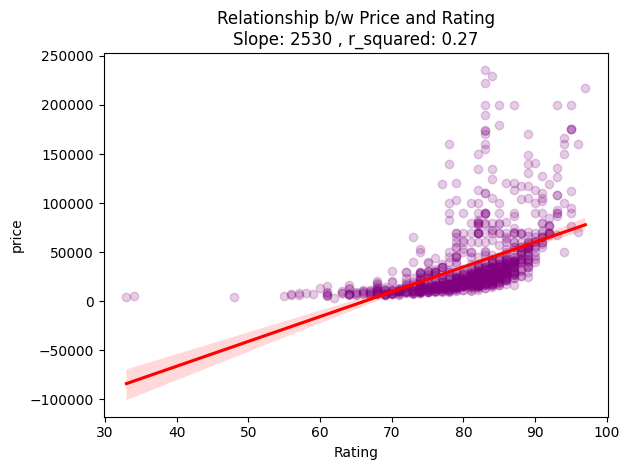

In [161]:
slope, intercept, r_value, p_value, std_err = linregress(new_df["rating"],new_df["price"])

sns.regplot(
    x= new_df.rating,
    y= new_df.price,
    line_kws= {"color":"red"},
    scatter_kws= {"alpha":0.2,"color":"purple"}
)
plt.title(f"Relationship b/w Price and Rating\nSlope: {round(slope)} , r_squared: {round(r_value**2,2)}")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

### Brand vs Rating

In [162]:
new_df.brand.value_counts()

brand
Samsung      134
Vivo         127
Realme       113
Oppo          79
Xiaomi        77
Motorola      59
Iqoo          55
Oneplus       52
Poco          43
Infinix       42
Apple         41
Tecno         31
Lava          29
Google        22
Honor         20
Nothing       16
Nubia          8
Huawei         7
Cmf            6
Itel           6
Hmd            5
Nokia          4
Ai+            4
Sony           4
Asus           4
Acer           3
Jio            2
Unihertz       2
Snexian        2
Doogee         2
Bluefox        1
Ulefone        1
Energizer      1
Red magic      1
Blackview      1
Meizu          1
Zte            1
Redmi          1
Oscal          1
Sharp          1
Moondrop       1
Tcl            1
Name: count, dtype: int64

In [169]:
temp_df = new_df.brand.value_counts().reset_index()
lis = temp_df[temp_df["count"].gt(10)].set_index("brand").index.to_list()

clean_df = new_df[new_df.brand.isin(lis)]

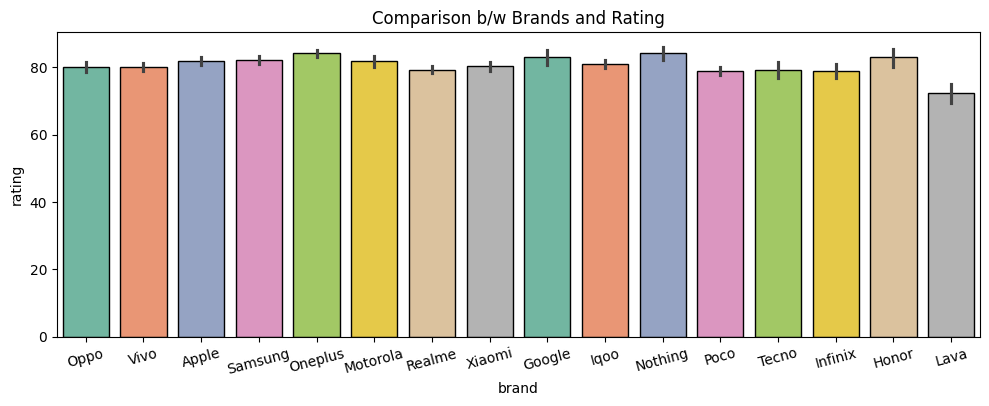

In [174]:
plt.figure(figsize= (10,4))
sns.barplot(
    x= clean_df.brand,
    y= clean_df.rating,
    palette= "Set2",
    edgecolor= "k"
)
plt.title("Comparison b/w Brands and Rating")
plt.tight_layout()
plt.xticks(rotation= 15)
plt.show()

### Correlation b/w all Numerical columns: 

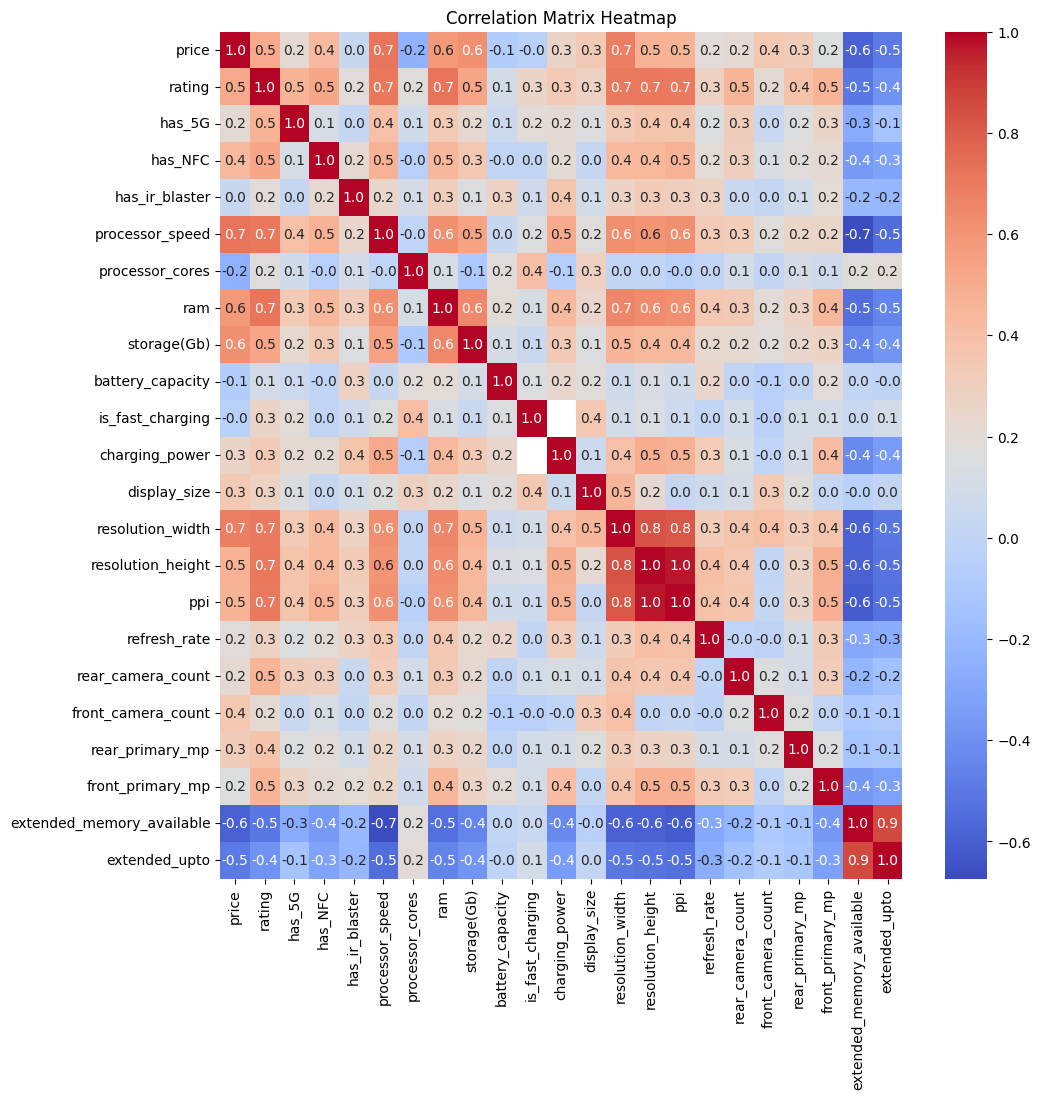

In [204]:
correlation_matrix= new_df.corr(numeric_only= True)
plt.figure(figsize= (11,11))
sns.heatmap(correlation_matrix, cmap= "coolwarm",
           annot= True,
           fmt= "0.1f")
plt.title("Correlation Matrix Heatmap")
plt.show()